# **BANKIT A2A**

[calendario pubblicazioni](https://www.bancaditalia.it/statistiche/calendario-pubblicazioni/calendario-pubblicazioni.html)

- 95 TDB in STABOL
- 10 TDB in STAMEN
- 04 TDC in STABOL
- 71 TRI in STACORIS
- 43 TFR in STAFINRA

In [1]:
import requests, zipfile, io, pandas as pd, os, glob
os.chdir('D:/files/csv/Bankit')

## scaricare un solo file zippato

In [ ]:
url = 'https://a2a.bancaditalia.it/infostat/dataservices/export/IT/CSV/ALL/PUBLICATION/BANKITALIA/DIFF/BAM'
output = os.path.basename(url)
if not output.endswith('.zip'):
        output += '.zip'
r = requests.get(url)
if r.status_code == 200:  # Verifica che la richiesta sia andata a buon fine
        with open(output, 'wb') as f:
            f.write(r.content)
        print(f"File scaricato e salvato come: {output}")
else:
        print(f"Errore durante il download. Status code: {r.status_code}")

## scaricarli tutti

In [ ]:
data = {
'pubblicazione' : ['BAM'],
'legenda' : ['Banche e moneta: serie nazionali']}

root = 'https://a2a.bancaditalia.it/infostat/dataservices/export/IT/CSV/ALL/PUBLICATION/BANKITALIA/DIFF/'

links = pd.DataFrame(data)
links

In [2]:
data = {
'pubblicazione' : ['STABOL','STAMEN','STACORIS','STAFINRA','STAATER','BAM','MFN','CFI','BOP','FPI','FPR','FPE',
 'SDDS','STASDP','IBF','SST','EXSTA'],
'legenda' : ['Struttura e operatività di banche e altri intermediari finanziari (Bollettino statistico) – trimestrale',
 'Struttura e operatività di banche e altri intermediari finanziari (Bollettino statistico) – mensile',
 'Banche e istituzioni finanziarie: condizioni e rischiosità del credito per settori e territori',
 'Banche e istituzioni finanziarie: finanziamenti e raccolta per settori e territori',
 'Banche e istituzioni finanziarie: articolazione territoriale','Banche e moneta: serie nazionali',
 'Mercato finanziario','Conti finanziari',"Bilancia dei pagamenti e posizione patrimoniale sull'estero",
 'Finanza pubblica: fabbisogno e debito','Debito delle Amministrazioni locali',
 "Statistiche di finanza pubblica nei paesi dell'Unione europea",
 'Statistiche Special Data Dissemination Standard Plus (SDDS Plus) del Fondo Monetario Internazionale (FMI)',
 'Statistiche sul sistema dei pagamenti','Indagini sui bilanci delle famiglie italiane',
'Tavole storiche - Indicatori monetari e finanziari','Tavole non più aggiornate']}

root = 'https://a2a.bancaditalia.it/infostat/dataservices/export/IT/CSV/ALL/PUBLICATION/BANKITALIA/DIFF/'

links = pd.DataFrame(data)
links

,pubblicazione,legenda
0,STABOL,Struttura e operatività di banche e altri inte...
1,STAMEN,Struttura e operatività di banche e altri inte...
2,STACORIS,Banche e istituzioni finanziarie: condizioni e...
3,STAFINRA,Banche e istituzioni finanziarie: finanziament...
4,STAATER,Banche e istituzioni finanziarie: articolazion...
5,BAM,Banche e moneta: serie nazionali
6,MFN,Mercato finanziario
7,CFI,Conti finanziari
8,BOP,Bilancia dei pagamenti e posizione patrimonial...
9,FPI,Finanza pubblica: fabbisogno e debito


In [3]:
root + links['pubblicazione'][1]

'https://a2a.bancaditalia.it/infostat/dataservices/export/IT/CSV/ALL/PUBLICATION/BANKITALIA/DIFF/STAMEN'

## unzip

In [ ]:
from zipfile import ZipFile  # importing required modules 
file_name = "BAM_DOMAIN.zip" # specifying the zip file name  
with ZipFile(file_name, 'r') as zip:  # opening the zip file in READ mode 
    zip.printdir()      # printing all the contents of the zip file 
    print('Extracting all the files now...')     # extracting all the files 
    zip.extractall() 
    print('Done!') 

## scaricare i dati delle pubblicazioni e decomprimerli

In [4]:
import os
import requests
import zipfile
import io

# Supponiamo che 'links' e 'root' siano già definiti
for i in links.index:
    # Costruisci l'URL usando root + il valore della colonna 'pubblicazione'
    url = root + links['pubblicazione'][i]
    
    # Estrarre il nome del file dall'URL
    output = os.path.basename(url)

    # Aggiungere ".zip" solo se non è già presente
    if not output.endswith('.zip'):
        output += '.zip'

    # Effettuare la richiesta e salvare il contenuto
    r = requests.get(url)
    if r.status_code == 200:  # Verifica che la richiesta sia andata a buon fine
        with open(output, 'wb') as f:
            f.write(r.content)
        print(f"File scaricato e salvato come: {output}")
    else:
        print(f"Errore durante il download. Status code: {r.status_code}")

    # Nome fisso del file per la cartella
    file_name = links['pubblicazione'][i]
    
    # Crea una cartella con lo stesso nome del file
    if not os.path.exists(file_name):
        os.makedirs(file_name)
        print(f"creata cartella: {file_name}")
    # Scarica il file ZIP utilizzando l'URL già definito (sostituito 'file_url' con 'url')
    result = requests.get(url)
    
    # Decomprimere il contenuto del file ZIP nella cartella appena creata
    with zipfile.ZipFile(io.BytesIO(result.content)) as z:
        z.extractall(file_name)
    
    print(f"File decompresso in: {file_name}")

File scaricato e salvato come: STABOL.zip
creata cartella: STABOL
File decompresso in: STABOL
File scaricato e salvato come: STAMEN.zip
creata cartella: STAMEN
File decompresso in: STAMEN
File scaricato e salvato come: STACORIS.zip
creata cartella: STACORIS
File decompresso in: STACORIS
File scaricato e salvato come: STAFINRA.zip
creata cartella: STAFINRA
File decompresso in: STAFINRA
File scaricato e salvato come: STAATER.zip
creata cartella: STAATER
File decompresso in: STAATER
File scaricato e salvato come: BAM.zip
creata cartella: BAM
File decompresso in: BAM
File scaricato e salvato come: MFN.zip
creata cartella: MFN
File decompresso in: MFN
File scaricato e salvato come: CFI.zip
creata cartella: CFI
File decompresso in: CFI
File scaricato e salvato come: BOP.zip
creata cartella: BOP
File decompresso in: BOP
File scaricato e salvato come: FPI.zip
creata cartella: FPI
File decompresso in: FPI
File scaricato e salvato come: FPR.zip
creata cartella: FPR
File decompresso in: FPR
File 

In [ ]:
import os
import requests
import zipfile
import io

# Funzione ricorsiva per decomprimere ZIP nidificati
def unzip_recursive(zip_file, extract_path):
    """
    Funzione ricorsiva per decomprimere file ZIP nidificati.
    Decompone ogni file ZIP dentro un'altra cartella finché non arriviamo ai CSV.
    """
    with zipfile.ZipFile(zip_file, 'r') as z:
        # Itera su ogni file nel file ZIP
        for file_name in z.namelist():
            # Definisce il percorso completo per estrarre il file
            extracted_file = os.path.join(extract_path, file_name)
            
            # Se il file è un altro file ZIP, decomprimilo ricorsivamente
            if file_name.endswith('.zip'):
                # Crea una cartella per il file ZIP nidificato
                new_extract_path = os.path.splitext(extracted_file)[0]  # Rimuove l'estensione .zip
                os.makedirs(new_extract_path, exist_ok=True)
                
                # Estrai il file ZIP
                with z.open(file_name) as f:
                    unzip_recursive(f, new_extract_path)  # Chiamata ricorsiva
            else:
                # Se il file non è un ZIP, estrailo normalmente
                with z.open(file_name) as f, open(extracted_file, 'wb') as out_f:
                    out_f.write(f.read())
                print(f"File estratto: {extracted_file}")

## decomprime tutti i zip data per ottenere i csv

In [ ]:
for i in links.index:
    # Costruisci l'URL usando root + il valore della colonna 'pubblicazione'
    url = root + links['pubblicazione'][i]
    
    # Estrarre il nome del file dall'URL
    output = os.path.basename(url)

    # Aggiungere ".zip" solo se non è già presente
    if not output.endswith('.zip'):
        output += '.zip'

    # Effettuare la richiesta e salvare il contenuto
    r = requests.get(url)
    
    # Verifica che la richiesta sia andata a buon fine
    if r.status_code == 200:
        # Salva il contenuto ZIP
        with open(output, 'wb') as f:
            f.write(r.content)
        print(f"File scaricato e salvato come: {output}")
    else:
        print(f"Errore durante il download. Status code: {r.status_code}")
        continue  # Salta al prossimo file in caso di errore

    # Nome fisso del file per la cartella
    file_name = os.path.splitext(output)[0]  # Senza estensione .zip
    
    # Crea una cartella con lo stesso nome del file
    if not os.path.exists(file_name):
        os.makedirs(file_name)
        print(f"Creata cartella: {file_name}")

    # Decomprimere il contenuto del file ZIP nella cartella appena creata
    unzip_recursive(output, file_name)

    print(f"File decompresso in: {file_name}")


### salvare un zip 

In [ ]:
import requests

# URL del file zip
url = 'https://a2a.bancaditalia.it/infostat/dataservices/export/IT/CSV/ALL/PUBLICATION/BANKITALIA/DIFF/BAM'

# Percorso dove salvare il file zip
zip_file_path = 'D:/files/csv/Bankit/'

# Scaricare il file zip
response = requests.get(url)

# Verificare se il download è andato a buon fine (status code 200)
if response.status_code == 200:
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)
    print(f"File salvato come {zip_file_path}")
else:
    print(f"Errore nel download del file. Status code: {response.status_code}")



## BAM

In [ ]:
import zipfile
import os

# Path al file BAM.zip
bam_zip_path = 'D:/files/csv/Bankit/BAM.zip'

# Funzione per estrarre e leggere l'header di ogni CSV in un file ZIP
def read_csv_headers(bam_zip_path):
    with zipfile.ZipFile(bam_zip_path, 'r') as bam_zip:
        # Estrai BAM_DATA.zip da BAM.zip
        with bam_zip.open('BAM_DATA.zip') as bam_data_zip:
            with zipfile.ZipFile(bam_data_zip) as data_zip:
                # Per ogni file zippato (BSIB0100.zip, BSIB0200.zip, ecc.)
                for file_name in data_zip.namelist():
                    with data_zip.open(file_name) as csv_zip:
                        # Estrai il contenuto del CSV zippato
                        with zipfile.ZipFile(csv_zip) as csv_file_zip:
                            # Supponiamo ci sia un solo file CSV per ogni zip, estrai l'header
                            for csv_name in csv_file_zip.namelist():
                                with csv_file_zip.open(csv_name) as csv_file:
                                    header = csv_file.readline().decode('utf-8')
                                    print(f"Header of {file_name}: {header}")

# Esegui la funzione
read_csv_headers(bam_zip_path)


### ATECO100

Header of ATECO100_IT.zip: "DATA_OSS";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000060";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000061";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000062";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000063";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000066";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000067";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000068";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000069";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000070";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1000073";"BAM_ATECO.M.1070001.52000700.101.IT.S11.1004999";"BAM_ATECO.M.1070001.52000700.101.IT.S11.22";"BAM_ATECO.M.1070001.52000700.101.IT.S11.28";"BAM_ATECO.M.1070001.52000700.101.IT.S11.A";"BAM_ATECO.M.1070001.52000700.101.IT.S11.B";"BAM_ATECO.M.1070001.52000700.101.IT.S11.C";"BAM_ATECO.M.1070001.52000700.101.IT.S11.D";"BAM_ATECO.M.1070001.52000700.101.IT.S11.E";"BAM_ATECO.M.1070001.52000700.101.IT.S11.F";"BAM_ATECO.M.1070001.52000700.101.IT.S11.G";"BAM_ATECO.M.1070001.52000700.101.IT.S11.H";"BAM_ATECO.M.1070001.52000700.101.IT.S11.I";"BAM_ATECO.M.1070001.52000700.101.IT.S11.J";"BAM_ATECO.M.1070001.52000700.101.IT.S11.L";"BAM_ATECO.M.1070001.52000700.101.IT.S11.M";"BAM_ATECO.M.1070001.52000700.101.IT.S11.N";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000060";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000061";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000062";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000063";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000066";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000067";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000068";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000069";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000070";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1000073";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.1004999";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.22";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.28";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.A";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.B";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.C";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.D";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.E";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.F";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.G";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.H";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.I";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.J";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.L";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.M";"BAM_ATECO.M.1070001.52000700.101.IT.S14BI2.N";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000060";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000061";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000062";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000063";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000066";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000067";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000068";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000069";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000070";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1000073";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.1004999";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.22";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.28";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.A";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.B";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.C";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.D";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.E";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.F";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.G";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.H";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.I";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.J";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.L";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.M";"BAM_ATECO.M.1070001.52000700.101.IT.SBI25.N"

In [ ]:
import zipfile
import pandas as pd

# Path al file BAM.zip
bam_zip_path = 'D:/files/csv/Bankit/BAM.zip'
# Percorso di esempio del CSV
example_csv_path = 'D:/files/csv/Bankit/BAM/BAM_DATA/AGGM0100_IT/20241108_104015-TIMESERIES-MULTICUBE.csv'

def read_csv_headers_and_dataframes(bam_zip_path, example_csv_path):
    try:
        example_dataframe = None

        # Carica direttamente il CSV di esempio con gestione degli errori
        example_dataframe = pd.read_csv(example_csv_path, sep=';')
      
        print(f"Loaded DataFrame for {example_csv_path}:")
        print(example_dataframe.head())

        return example_dataframe

    except Exception as e:
        print(f"Errore durante la lettura del CSV: {e}")
        return None

# Esegui la funzione e ottieni un DataFrame di esempio
example_dataframe = read_csv_headers_and_dataframes(bam_zip_path, example_csv_path)

# Ad esempio, stampa il DataFrame
if example_dataframe is not None:
    print("Example DataFrame:")
    print(example_dataframe)



In [ ]:
import zipfile
import pandas as pd

# Path al file BAM.zip
bam_zip_path = 'D:/files/csv/Bankit/BAM.zip'
# Percorso di esempio del CSV
example_csv_path = 'D:/files/csv/Bankit/BAM/BAM_DATA/ATECO100_IT/20241206_184508-TIMESERIES-MULTICUBE.csv'

def read_csv_headers_and_dataframes(bam_zip_path, example_csv_path):
    try:
        example_dataframe = None

        # Carica direttamente il CSV di esempio con gestione degli errori
        example_dataframe = pd.read_csv(example_csv_path, sep=';', usecols=['DATA_OSS','BAM_ATECO.M.1070001.52000700.101.IT.S11.A'])
        
        # Rinomina la colonna specifica
        example_dataframe.rename(columns={'BAM_ATECO.M.1070001.52000700.101.IT.S11.A': 'S11A'}, inplace=True)
        example_dataframe['DATA_OSS'] = pd.to_datetime(example_dataframe['DATA_OSS']) # , errors='coerce'
        
        print(f"Loaded DataFrame for {example_csv_path}:")
        print(example_dataframe.head())

        return example_dataframe

    except Exception as e:
        print(f"Errore durante la lettura del CSV: {e}")
        return None

# Esegui la funzione e ottieni un DataFrame di esempio
example_dataframe = read_csv_headers_and_dataframes(bam_zip_path, example_csv_path)

In [ ]:
import matplotlib.pyplot as plt

# Crea un lineplot con DATA_OSS e S11A
plt.figure(figsize=(10, 6))
plt.plot(example_dataframe['DATA_OSS'], example_dataframe['S11A'], marker='.', linestyle='-', label='S11A')
plt.title('Trend di S11A nel tempo')
plt.xlabel('DATA_OSS')
plt.ylabel('S11A')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path alla cartella con i CSV
csv_folder_path = 'D:/files/csv/Bankit/BAM/BAM_DATA/ATECO100_IT/'

In [9]:
def get_most_recent_csv(folder_path):
    try:
        # Ottieni tutti i file CSV nella cartella
        csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
        if not csv_files:
            print("Nessun file CSV trovato nella cartella.")
            return None

        # Trova il file con la data più recente basata sul nome del file
        most_recent_csv = max(csv_files, key=lambda x: os.path.getmtime(os.path.join(folder_path, x)))
        return os.path.join(folder_path, most_recent_csv)

    except Exception as e:
        print(f"Errore durante la ricerca del file CSV più recente: {e}")
        return None

In [15]:
def read_csv_headers_and_dataframes(csv_path):
    try:
        example_dataframe = None

        # Carica direttamente il CSV con gestione degli errori
        example_dataframe = pd.read_csv(csv_path, sep=';', usecols=['BAM_ATECO.M.1070001.52000700.101.IT.SBI25.28', 'DATA_OSS'])
        
        # Rinomina la colonna specifica
        example_dataframe.rename(columns={'BAM_ATECO.M.1070001.52000700.101.IT.SBI25.28': 'SBI25'}, inplace=True)
        
        # Converte la colonna 'DATA_OSS' in formato datetime
        example_dataframe['DATA_OSS'] = pd.to_datetime(example_dataframe['DATA_OSS'])
      
        print(f"Loaded DataFrame for {csv_path}:")
        print(example_dataframe.head())

        return example_dataframe

    except Exception as e:
        print(f"Errore durante la lettura del CSV: {e}")
        return None

In [16]:
# Trova il file CSV più recente
most_recent_csv_path = get_most_recent_csv(csv_folder_path)
most_recent_csv_path

'D:/files/csv/Bankit/BAM/BAM_DATA/ATECO100_IT/20241206_184508-TIMESERIES-MULTICUBE.csv'

In [17]:
example_dataframe = read_csv_headers_and_dataframes(most_recent_csv_path)

Loaded DataFrame for D:/files/csv/Bankit/BAM/BAM_DATA/ATECO100_IT/20241206_184508-TIMESERIES-MULTICUBE.csv:
    DATA_OSS    SBI25
0 2024-10-31  20247.0
1 2024-09-30  20756.0
2 2024-08-31  20609.0
3 2024-07-31  21036.0
4 2024-06-30  21067.0


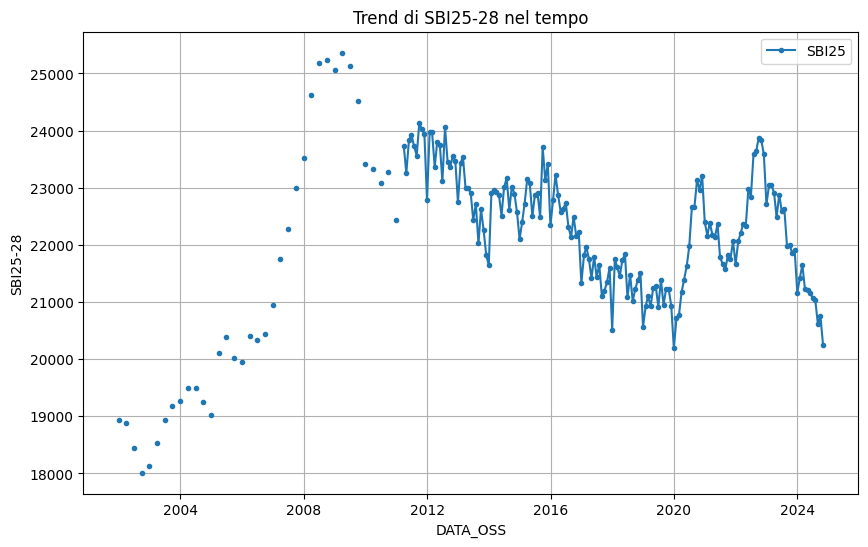

In [21]:
# Esegui la funzione e ottieni un DataFrame di esempio
if most_recent_csv_path:
    

    # Ad esempio, stampa il DataFrame
    if example_dataframe is not None:
        # print("Example DataFrame:")
        # print(example_dataframe)

        # Crea un lineplot con DATA_OSS e S11A
        plt.figure(figsize=(10, 6))
        plt.plot(example_dataframe['DATA_OSS'], example_dataframe['SBI25'], marker='.', linestyle='-', label='SBI25')
        plt.title('Trend di SBI25-28 nel tempo')
        plt.xlabel('DATA_OSS')
        plt.ylabel('SBI25-28')
        plt.legend()
        plt.grid(True)
        plt.show()

Loaded DataFrame for D:/files/csv/Bankit/BAM/BAM_DATA/ATECO100_IT/20241206_184508-TIMESERIES-MULTICUBE.csv:
    DATA_OSS     S11A    SBI25
0 2024-10-31  18713.0  38130.0
1 2024-09-30  18589.0  38081.0
2 2024-08-31  18426.0  38011.0
3 2024-07-31  18635.0  38347.0
4 2024-06-30  18656.0  38371.0
Example DataFrame:


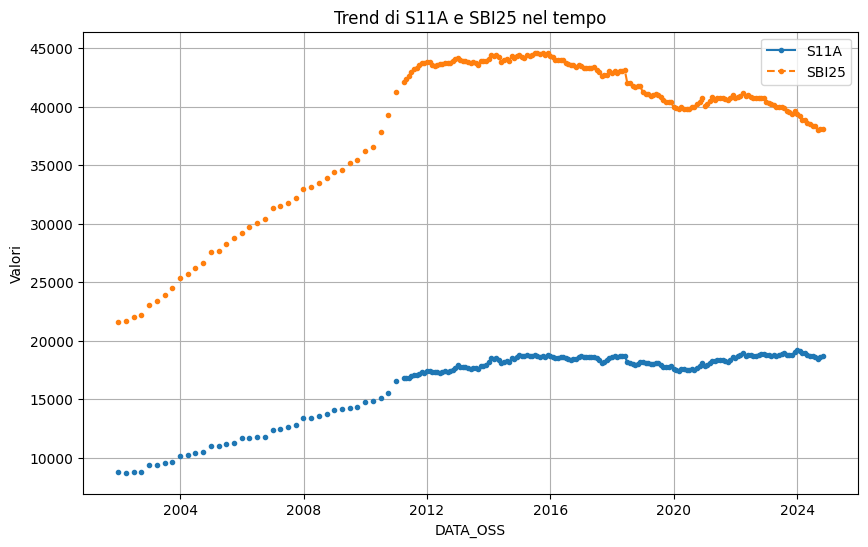

In [6]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path alla cartella con i CSV
csv_folder_path = 'D:/files/csv/Bankit/BAM/BAM_DATA/ATECO100_IT/'

def get_most_recent_csv(folder_path):
    try:
        # Ottieni tutti i file CSV nella cartella
        csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
        if not csv_files:
            print("Nessun file CSV trovato nella cartella.")
            return None

        # Trova il file con la data più recente basata sul nome del file
        most_recent_csv = max(csv_files, key=lambda x: os.path.getmtime(os.path.join(folder_path, x)))
        return os.path.join(folder_path, most_recent_csv)

    except Exception as e:
        print(f"Errore durante la ricerca del file CSV più recente: {e}")
        return None

def read_csv_headers_and_dataframes(csv_path):
    try:
        example_dataframe = None

        # Carica direttamente il CSV con gestione degli errori
        example_dataframe = pd.read_csv(csv_path, sep=';', 
                                        usecols=['BAM_ATECO.M.1070001.52000700.101.IT.S11.A', 
                                                 'BAM_ATECO.M.1070001.52000700.101.IT.SBI25.A', 
                                                 'DATA_OSS'])
        
        # Rinomina le colonne specifiche
        example_dataframe.rename(columns={
            'BAM_ATECO.M.1070001.52000700.101.IT.S11.A': 'S11A',
            'BAM_ATECO.M.1070001.52000700.101.IT.SBI25.A': 'SBI25'
        }, inplace=True)
        
        # Converte la colonna 'DATA_OSS' in formato datetime
        example_dataframe['DATA_OSS'] = pd.to_datetime(example_dataframe['DATA_OSS'], errors='coerce')
      
        print(f"Loaded DataFrame for {csv_path}:")
        print(example_dataframe.head())

        return example_dataframe

    except Exception as e:
        print(f"Errore durante la lettura del CSV: {e}")
        return None

# Trova il file CSV più recente
most_recent_csv_path = get_most_recent_csv(csv_folder_path)

# Esegui la funzione e ottieni un DataFrame di esempio
if most_recent_csv_path:
    example_dataframe = read_csv_headers_and_dataframes(most_recent_csv_path)

    # Ad esempio, stampa il DataFrame
    if example_dataframe is not None:
        print("Example DataFrame:")
        (example_dataframe)

        # Crea un lineplot con DATA_OSS, S11A e SBI25
        plt.figure(figsize=(10, 6))
        plt.plot(example_dataframe['DATA_OSS'], example_dataframe['S11A'], marker='.', linestyle='-', label='S11A')
        plt.plot(example_dataframe['DATA_OSS'], example_dataframe['SBI25'], marker='.', linestyle='--', label='SBI25')
        plt.title('Trend di S11A e SBI25 nel tempo')
        plt.xlabel('DATA_OSS')
        plt.ylabel('Valori')
        plt.legend()
        plt.grid(True)
        plt.show()


In [14]:
example_dataframe.columns

Index(['DATA_OSS', 'S11A'], dtype='object')

In [ ]:
# TDB10207
file = 'https://a2a.bancaditalia.it/infostat/dataservices/export/IT/CSV/DATA/CUBE/BANKITALIA/DIFF/TDB10207'
result = requests.get(file)
df = pd.read_csv(BytesIO(result.content),compression='zip', header=0, sep=';', quotechar='"', encoding='utf-8')
df.to_sql('TDB10207', sqlite, if_exists='replace')

In [ ]:
import sqlalchemy
from sqlalchemy import create_engine
sqlite = create_engine('sqlite:///D:/Bankit.sqlite')
import sqlite3
import os
import pandas as pd

In [ ]:
df = pd.read_csv('legend.csv', sep=';')
df.to_sql('legend', sqlite, if_exists='replace')

In [ ]:
df = pd.read_csv('domain.csv', sep=';')
df.to_sql('domain', sqlite, if_exists='replace')

In [ ]:
df = pd.read_csv('structure.csv', sep=';')
df.to_sql('structure', sqlite, if_exists='replace')

## **creazione SQLITE e Parquet files**

In [ ]:
import requests, zipfile, io, pandas as pd, os, glob, sqlalchemy
from sqlalchemy import create_engine
sqlite = create_engine('sqlite:///D:/files/Bankit.sqlite')
import sqlite3


In [ ]:
df = pd.read_csv('D:/files/csv/Bankit/io_tavole.tsv',sep='\t')
df.to_sql('io_tavole', sqlite, if_exists='replace', index=False)

### BAM

In [ ]:
# BAM
os.chdir('D:\\files\\csv\\Bankit\\BAM')
df = pd.read_csv('STRUCTURE-TIMESERIES-MULTICUBE.csv',sep=';')
df.to_sql('STRUCTURE-TIMESERIES-MULTICUBE', sqlite, if_exists='replace', index=False)

df = pd.read_csv('LEGEND-TIMESERIES-MULTICUBE.csv',sep=';')
df.to_sql('LEGEND-TIMESERIES-MULTICUBE', sqlite, if_exists='replace', index=False)

df = pd.read_csv('DOMAIN-TIMESERIES-MULTICUBE.csv',sep=';')
df.to_sql('DOMAIN-TIMESERIES-MULTICUBE', sqlite, if_exists='replace', index=False)

## **Import cubi in un DB SQLite**

In [ ]:
%%time
import os
import pandas as pd
import sqlite3
import datetime
from pathlib import Path

date_column = ['DATA_OSS']
folder = Path('D:/files/csv/Bankit/BAM')  #     <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
db_name = 'D:/files/csv/Bankit/Bankit.db'  # Nome del database SQLite

def process_csv(file_path, output_dir):
    try:
        df = pd.read_csv(file_path, sep=';', quotechar='"', parse_dates=date_column, dayfirst=False,decimal=',',
                        dtype={
                            'ENTE_SEGN': 'str',
                            'FENEC': 'str',
                            'LOC_SPORT': 'str',
                            'DIVISA1': 'str',
                            'DURORI': 'str',
                            'DESINV': 'str',
                            'TIPTASSO': 'str',
                            'TIPO_CONTRATTO': 'str',
                            'LEGG': 'str',
                            'VITRES': 'str',
                            'TIP_ATT': 'str',
                            'PORTAF_CONTAB': 'str',
                            'VALORE': 'float'  # Assicuriamo che "VALORE" sia trattato come float
                        })

        # Estrai la parte finale del nome del file (dopo il secondo trattino)
        output_filename = os.path.basename(file_path).split('-')[-1]

        # Controlla la colonna 'DATA_OSS' e convertila nel formato data (opzionale, aggiusta il formato se necessario)
        if 'DATA_OSS' in df.columns:
            df['DATA_OSS'] = pd.to_datetime(df['DATA_OSS'], format='%d/%m/%Y', errors='coerce')

        # Connetti al database SQLite
        conn = sqlite3.connect(db_name)

        # Estrai il nome della tabella dal nome del file (opzionale, aggiusta se necessario)
        table_name = output_filename.replace('.csv', '')  # Rimuovi l'estensione

        # Verifica se la tabella esiste nel database
        query = f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}';"
        table_exists = pd.read_sql(query, conn)

        # Se la tabella esiste, aggiorna i dati, altrimenti crea la tabella e inserisci i dati
        if not table_exists.empty:
            # Se la tabella esiste, aggiungi i dati (append)
            df.to_sql(table_name, conn, if_exists='replace', index=False)
            # df.to_sql(table_name, conn, if_exists='append', index=False)
        else:
            # Se la tabella non esiste, crea una nuova tabella e inserisci i dati
            df.to_sql(table_name, conn, if_exists='replace', index=False)

        # Commit dei cambiamenti e chiusura della connessione
        conn.commit()
        conn.close()

        # Salvataggio opzionale su file parquet (decommenta se necessario)
        # output_file = os.path.join(output_dir, output_filename.replace('.csv', '.parquet'))
        # df.to_parquet(output_file)

    except PermissionError as e:
        print(f"Permesso negato per il file {file.name}: {e}")
    except Exception as e:
        print(f"Errore nell'elaborazione del file {file.name}: {e}")

# Directory di output (modifica se necessario)
output_dir = "D:/files/csv/Bankit"  # Opzionale, commenta se non salvi su parquet

# Elabora tutti i file CSV nella cartella
for file in folder.rglob('*.csv'):
    print(file.name)
    process_csv(file, output_dir)


In [ ]:
conn.close()

## realizzazione di un DB Access

## SQLite 2 Access

In [ ]:
%%time
import sqlite3
import pyodbc
from datetime import datetime

def sqlite_to_access(sqlite_db, access_db, type_mapping=None):
    try:
        # Connessione ai database
        sqlite_conn = sqlite3.connect(sqlite_db)
        access_conn = pyodbc.connect(r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=' + access_db)

        sqlite_cursor = sqlite_conn.cursor()
        access_cursor = access_conn.cursor()

        # Mappatura dei tipi di dati
        default_mapping = {
            'INTEGER': 'Long',
            'REAL': 'Double',
            'TEXT': 'Text',
            'BLOB': 'OLE Object',
            'DATE': 'Date/Time',
            'DATETIME': 'Date/Time',
            'NUMERIC': 'Double'
        }
        type_mapping = type_mapping or default_mapping

        # Ottieni l'elenco delle tabelle in SQLite
        sqlite_cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
        tables = sqlite_cursor.fetchall()

        for table in tables:
            table_name = table[0]
            print(f"Processando la tabella: {table_name}")

            # Ottieni i dati e i nomi delle colonne da SQLite
            sqlite_cursor.execute(f"SELECT * FROM {table_name}")
            data = sqlite_cursor.fetchall()
            column_names = [description[0] for description in sqlite_cursor.description]

            # Ottieni i tipi di dati delle colonne
            sqlite_cursor.execute(f"PRAGMA table_info({table_name})")
            columns_info = sqlite_cursor.fetchall()
            column_types = [type_mapping.get(col[2].upper(), 'Text') for col in columns_info]

            # Normalizza i nomi delle colonne e delle tabelle
            normalized_table_name = table_name.replace(" ", "_").replace("-", "_")
            normalized_column_names = [col.replace(" ", "_").replace("-", "_") for col in column_names]

            # Controlla se la tabella esiste in Access
            try:
                print(f"Provo a svuotare la tabella '{normalized_table_name}'...")
                access_cursor.execute(f"DELETE FROM {normalized_table_name}")
            except Exception:
                print(f"La tabella '{normalized_table_name}' non esiste. Creazione in corso...")
                column_definitions = ", ".join([f"[{col}] {type}" for col, type in zip(normalized_column_names, column_types)])
                create_query = f"CREATE TABLE {normalized_table_name} ({column_definitions})"
                print(f"Creazione tabella: {create_query}")
                access_cursor.execute(create_query)

            # Inserimento dei dati a blocchi
            batch_size = 10000
            insert_query = f"INSERT INTO {normalized_table_name} ({', '.join([f'[{col}]' for col in normalized_column_names])}) VALUES ({', '.join(['?' for _ in normalized_column_names])})"
            print(f"Inserimento dati con query: {insert_query}")

            for i in range(0, len(data), batch_size):
                batch = data[i:i+batch_size]
                try:
                    access_cursor.executemany(insert_query, batch)
                    print(f"Inserito blocco {i} - {i + len(batch)}")
                    access_conn.commit()
                except Exception as e:
                    print(f"Errore durante l'inserimento del blocco {i} - {i + len(batch)}: {e}")

        print("Conversione completata con successo!")

    except pyodbc.Error as e:
        print(f"Errore durante la connessione al database Access: {e}")
    except sqlite3.Error as e:
        print(f"Errore durante la connessione al database SQLite: {e}")
    except Exception as e:
        print(f"Errore imprevisto: {e}")
    finally:
        if sqlite_conn:
            sqlite_conn.close()
        if access_conn:
            access_conn.close()


# Esempio di utilizzo
sqlite_db_path = "D:/files/csv/Bankit/Bankit.db"
access_db_path = "D:/files/csv/Bankit/Bankit.accdb"

sqlite_to_access(sqlite_db_path, access_db_path)


## altro

In [ ]:
from pathlib import Path

folder = Path('D:/files/csv/Bankit/STAFINRA')
for file in folder.rglob('*'):
    print(file.name)

In [ ]:
# STAFINRA
os.chdir('D:\\files\\csv\\Bankit\\STAFINRA')
df = pd.read_csv('STRUCTURE-STAFINRA-MULTICUBE.csv',sep=';')
df.to_sql('STRUCTURE-STAFINRA-MULTICUBE', sqlite, if_exists='replace', index=False)

df = pd.read_csv('LEGEND-STAFINRA-MULTICUBE.csv',sep=';')
df.to_sql('LEGEND-STAFINRA-MULTICUBE', sqlite, if_exists='replace', index=False)

In [ ]:
import glob 
os.chdir('D:\\files\\csv\\Bankit\\STAFINRA')
file = glob.glob('*DOMAIN-STAFINRA-MULTICUBE.csv')[0]
prefix = file.split('-')[0]+'-'
out = file.removeprefix(prefix)
out = out.split('.')[0]

df = pd.read_csv(file,sep=';')

 # create a list of new rows
new_rows = [{'Dominio': 'TERRITORIO','Elemento': 'ITC20', 'Descrizione': 'Aosta'}, 
            {'Dominio': 'TERRITORIO','Elemento': 'ITG2D', 'Descrizione': 'Sassari'},
            {'Dominio': 'TERRITORIO','Elemento': 'ITG2E', 'Descrizione': 'Nuoro'},
            {'Dominio': 'TERRITORIO','Elemento': 'ITG2F', 'Descrizione': 'Cagliari'},
            {'Dominio': 'TERRITORIO','Elemento': 'ITG2G', 'Descrizione': 'Oristano'}]
df = df._append(new_rows,ignore_index=True)

df.to_sql('DOMAIN-STAFINRA-MULTICUBE', sqlite, if_exists='replace', index=False)

In [ ]:
conn = sqlite3.connect("D:/bankit.sqlite")

conn.execute("""
DROP VIEW "main"."tfr40100";""")

In [ ]:
conn.execute("""
CREATE VIEW tfr40100 as
select DATA_OSS, 
ENTE_SEGN cod_ENTE_SEGN, b1.descrizione ENTE_SEGN,
FENEC cod_fenec, b2.descrizione FENEC,
LOC_CTP cod_LOC_CTP, b3.descrizione LOC_CTP,
SET_CTP cod_SET_CTP, b4.descrizione SET_CTP, 
VALORE from stafinra_tfr40100 a 

LEFT join "DOMAIN-STAFINRA-MULTICUBE" b1 on a.ENTE_SEGN = b1.elemento 
LEFT join "DOMAIN-STAFINRA-MULTICUBE" b2 on a.FENEC = b2.elemento
LEFT join "DOMAIN-STAFINRA-MULTICUBE" b3 on a.LOC_CTP = b3.elemento
LEFT join "DOMAIN-STAFINRA-MULTICUBE" b4 on a.SET_CTP = b4.elemento

where length(LOC_CTP)=5
and DATA_OSS = (select max(DATA_OSS) from stafinra_tfr40100) and set_CTP = 'SBI42'

order by 6
/*
ENTE_SEGN 	1100010	Banche
FENEC 		2003008	Garanzie rilasciate
ITC20 		Aosta
ITG2D 		Sassari
ITG2E 		Nuoro
ITG2F 		Cagliari
ITG2G 		Oristano

set_CTP
S11 	Società non finanziarie
S12BI7	Società finanziarie diverse da istituzioni finanziarie monetarie
S13		Amministrazioni pubbliche
S14BI4	Famiglie produttrici
SBI42 Totale residenti al netto delle Istituzioni finanziarie monetarie


*/
""")

In [ ]:
print(conn.execute("SELECT * FROM tfr40100").fetchall())

In [ ]:
data

### STABOL

In [ ]:
os.chdir('D:/files/csv/Bankit/STABOL')
date_column = ['DATA_OSS']

for filename in glob.glob('*TDB*.csv'):
   with open(os.path.join(os.getcwd(), filename), 'r') as csv: # open in readonly mode
       df = pd.read_csv(csv, sep=';', quotechar='"', encoding='utf-8', parse_dates=date_column, dayfirst=False,
                        dtype={
                            'ENTE_SEGN':'str', 
                            'FENEC':'str',
                            'LOC_SPORT':'str',
                            'DIVISA1':'str',
                            'DURORI':'str',
                            'DESINV':'str',
                            'TIPTASSO':'str',
                            'TIPO_CONTRATTO':'str',
                            'LEGG':'str',
                            'VITRES':'str',
                            'TIP_ATT':'str',
                           'PORTAF_CONTAB':'str'})
       file = filename.split('-')[-1]
       file = file.split('.')[-2]+'_STABOL'
       # print(file)
       # df.to_csv('D:/'+ file)
       df.to_parquet('D:/files/csv/Bankit/'+ file+'.parquet')
       #df.to_sql(file, sqlite, if_exists='replace', index=False) 

In [ ]:
# STABOL
os.chdir('D:\\files\\csv\\Bankit\\STABOL')
df = pd.read_csv('STRUCTURE-STABOL-MULTICUBE.csv',sep=';')
df.to_sql('STRUCTURE-STABOL-MULTICUBE', sqlite, if_exists='replace', index=False)

df = pd.read_csv('LEGEND-STABOL-MULTICUBE.csv',sep=';')
df.to_sql('LEGEND-STABOL-MULTICUBE', sqlite, if_exists='replace', index=False)

df = pd.read_csv('DOMAIN-STABOL-MULTICUBE.csv',sep=';')
df.to_sql('DOMAIN-STABOL-MULTICUBE', sqlite, if_exists='replace', index=False)

### [STAATER]()

### STAMEN

In [ ]:
os.chdir('D:/files/csv/Bankit/STAMEN')
date_column = ['DATA_OSS']

for filename in glob.glob('*TDB*.csv'):
   with open(os.path.join(os.getcwd(), filename), 'r') as csv: # open in readonly mode
       df = pd.read_csv(csv, sep=';', quotechar='"', encoding='utf-8', parse_dates=date_column, dayfirst=False,
                        dtype={
                            'ENTE_SEGN':'str', 
                            'FENEC':'str',
                            'LOC_SPORT':'str',
                            'DIVISA1':'str',
                            'DURORI':'str',
                            'DESINV':'str',
                            'TIPTASSO':'str',
                            'TIPO_CONTRATTO':'str',
                            'LEGG':'str',
                            'VITRES':'str',
                            'TIP_ATT':'str',
                           'PORTAF_CONTAB':'str'})
       file = filename.split('-')[-1]
       file = file.split('.')[-2]+'_STAMEN'
       # print(file)
       # df.to_csv('D:/'+ file)
       df.to_parquet('D:/files/csv/Bankit/'+ file+'.parquet')
       #df.to_sql(file, sqlite, if_exists='replace', index=False) 

In [ ]:
# STAMEN
os.chdir('D:\\files\\csv\\Bankit\\STAMEN')
df = pd.read_csv('STRUCTURE-STAMEN-MULTICUBE.csv',sep=';')
df.to_sql('STRUCTURE-STAMEN-MULTICUBE', sqlite, if_exists='replace', index=False)

df = pd.read_csv('LEGEND-STAMEN-MULTICUBE.csv',sep=';')
df.to_sql('LEGEND-STAMEN-MULTICUBE', sqlite, if_exists='replace', index=False)

df = pd.read_csv('DOMAIN-STAMEN-MULTICUBE.csv',sep=';')
df.to_sql('DOMAIN-STAMEN-MULTICUBE', sqlite, if_exists='replace', index=False)

### STACORIS

In [ ]:
os.chdir('D:/files/csv/Bankit/STACORIS')
date_column = ['DATA_OSS']

for filename in glob.glob('*TRI*.csv'):
   with open(os.path.join(os.getcwd(), filename), 'r') as csv: # open in readonly mode
       df = pd.read_csv(csv, sep=';', quotechar='"', encoding='utf-8', parse_dates=date_column, dayfirst=False,
                        dtype={
                            'ENTE_SEGN':'str', 
                            'FENEC':'str',
                            'LOC_SPORT':'str',
                            'DIVISA1':'str',
                            'DURORI':'str',
                            'DESINV':'str',
                            'TIPTASSO':'str',
                            'TIPO_CONTRATTO':'str',
                            'LEGG':'str',
                            'VITRES':'str',
                            'TIP_ATT':'str',
                           'PORTAF_CONTAB':'str'})
       file = filename.split('-')[-1]
       file = file.split('.')[-2]+'_STACORIS'
       # print(file)
       # df.to_csv('D:/'+ file)
       df.to_parquet('D:/files/csv/Bankit/'+ file+'.parquet')
       #df.to_sql(file, sqlite, if_exists='replace', index=False) 

In [ ]:
# STACORIS
os.chdir('D:\\files\\csv\\Bankit\\STACORIS')
df = pd.read_csv('STRUCTURE-STACORIS-MULTICUBE.csv',sep=';')
df.to_sql('STRUCTURE-STACORIS-MULTICUBE', sqlite, if_exists='replace', index=False)

df = pd.read_csv('LEGEND-STACORIS-MULTICUBE.csv',sep=';')
df.to_sql('LEGEND-STACORIS-MULTICUBE', sqlite, if_exists='replace', index=False)

df = pd.read_csv('DOMAIN-STACORIS-MULTICUBE.csv',sep=';')
df.to_sql('DOMAIN-STSTACORIS-MULTICUBE', sqlite, if_exists='replace', index=False)

### views

In [ ]:
# LEGEND
query = 'SELECT "STABOL" file, * FROM "LEGEND-STABOL-MULTICUBE" \
UNION \
SELECT "STAMEN" file, * FROM "LEGEND-STAMEN-MULTICUBE" \
UNION \
SELECT "BAM" file, * FROM "LEGEND-TIMESERIES-MULTICUBE" \
UNION \
SELECT "STACORIS" file, * FROM "LEGEND-STACORIS-MULTICUBE" \
UNION \
SELECT "STAFINRA" file, * FROM "LEGEND-STAFINRA-MULTICUBE" ;'
df = pd.read_sql_query(query, sqlite)
df.to_sql('LEGEND', sqlite, if_exists='replace', index=False)

In [ ]:
# STRUCTURE
query = 'SELECT "STABOL" file, * FROM "STRUCTURE-STABOL-MULTICUBE" \
UNION \
SELECT "STAMEN" file, * FROM "STRUCTURE-STAMEN-MULTICUBE" \
UNION \
SELECT "BAM" file, * FROM "STRUCTURE-TIMESERIES-MULTICUBE" \
UNION \
SELECT "STACORIS" file, * FROM "STRUCTURE-STACORIS-MULTICUBE" \
UNION \
SELECT "STAFINRA" file, * FROM "STRUCTURE-STAFINRA-MULTICUBE" ;'
df = pd.read_sql_query(query, sqlite)
df.to_sql('STRUCTURE', sqlite, if_exists='replace', index=False)

In [ ]:
# DOMAIN
query = 'SELECT "STABOL" file, * FROM "DOMAIN-STABOL-MULTICUBE" \
UNION \
SELECT "STAMEN" file, * FROM "DOMAIN-STAMEN-MULTICUBE" \
UNION \
SELECT "BAM" file, * FROM "DOMAIN-TIMESERIES-MULTICUBE" \
UNION \
SELECT "STACORIS" file, * FROM "DOMAIN-STSTACORIS-MULTICUBE" \
UNION \
SELECT "STAFINRA" file, * FROM "DOMAIN-STAFINRA-MULTICUBE" ;'
df = pd.read_sql_query(query, sqlite)
df.to_sql('DOMAIN', sqlite, if_exists='replace', index=False)

In [ ]:
os.chdir('D:/files/csv/Bankit/STAFINRA')
domain = pd.read_csv('DOMAIN-STAFINRA-MULTICUBE.csv', sep=';')

DESINV = domain.query('Dominio == "DESINV"')
DESINV.to_sql('DESINV', sqlite, if_exists='replace', index=False)

DURORI = domain.query('Dominio == "DURATA"')
DURORI.to_sql('DURORI', sqlite, if_exists='replace', index=False)

ENTE_SEGN = domain.query('Dominio == "AZIENDA"')
ENTE_SEGN.to_sql('ENTE_SEGN', sqlite, if_exists='replace', index=False)

FENEC = domain.query('Dominio == "FENOMECON"')
FENEC.to_sql('FENEC', sqlite, if_exists='replace', index=False)

LOC_CTP = domain.query('Dominio == "TERRITORIO"')
LOC_CTP.to_sql('LOC_CTP', sqlite, if_exists='replace', index=False)

RESIDENZA1 = domain.query('Dominio == "RESIDENZA1"')
RESIDENZA1.to_sql('RESIDENZA1', sqlite, if_exists='replace', index=False)

TIPTASSO = domain.query('Dominio == "TIPTASSO"')
TIPTASSO.to_sql('TIPTASSO', sqlite, if_exists='replace', index=False)

STATUS = domain.query('Dominio == "STATOSSERV"')
STATUS.to_sql('STATUS', sqlite, if_exists='replace', index=False)

In [ ]:
ATECO_CTP = codici.query('tipo == "ATECO_CTP"')[['Codice','Descrizione']]
CLASSE_ACCORD = codici.query('tipo == "CLASSE_ACCORD"')[['Codice','Descrizione']]
DESINV = codici.query('tipo == "DESINV"')[['Codice','Descrizione']]
DURORI = codici.query('tipo == "DURORI"')[['Codice','Descrizione']]
ENTE_SEGN = codici.query('tipo == "ENTE_SEGN"')[['Codice','Descrizione']]
FENEC = codici.query('tipo == "FENEC"')[['Codice','Descrizione']]
LIVAFF = codici.query('tipo == "LIVAFF"')[['Codice','Descrizione']]
# LOC_CTP = codici.query('tipo == "LOC_CTP"')[['Codice','Descrizione']]
RESIDENZA1 = codici.query('tipo == "RESIDENZA1"')[['Codice','Descrizione']]
SET_CTP = codici.query('tipo == "SET_CTP"')[['Codice','Descrizione']]
TIPTASSO = codici.query('tipo == "TIPTASSO"')[['Codice','Descrizione']]

In [ ]:
nuts = pd.read_csv('nuts.csv',sep='\t')
NUTS = pd.read_csv('Codici-statistici-e-denominazioni-al-22_01_2024.csv',sep=';', encoding ='ISO-8859-1', dtype='object')
NUTS.to_sql('NUTS', sqlite, if_exists='replace')

In [ ]:
NUTS = pd.read_csv('D:/files/csv/Istat/Codici-statistici-e-denominazioni-al-22_01_2024.csv', sep=';', encoding ='cp1252', dtype=object)
NUTS = NUTS[['Codice Regione', 'Codice Provincia (Storico)(1)', 'Codice Comune formato alfanumerico', 'Denominazione in italiano',
              'Denominazione Regione',"Denominazione dell'Unità territoriale sovracomunale \n(valida a fini statistici)",'Sigla automobilistica', 
              'Codice Comune formato numerico','Codice Catastale del comune', 'Codice NUTS1 2021','Codice NUTS2 2021 (3) ', 'Codice NUTS3 2021', 'Codice NUTS1 2024',
       'Codice NUTS2 2024 (3) ', 'Codice NUTS3 2024']]
NUTS = NUTS.rename(columns={
    'Codice Regione' : 'CodRegione', 
    'Codice Provincia (Storico)(1)' : 'CodProvincia', 
    'Codice Comune formato alfanumerico' : 'CodComuneAlfaNumerico', 
    'Denominazione in italiano' : 'denominazione',
    'Denominazione Regione' : 'Regione',
    "Denominazione dell'Unità territoriale sovracomunale \n(valida a fini statistici)" : 'Provincia',
    'Sigla automobilistica' : 'targa', 
    'Codice Comune formato numerico' : 'CodComuneNUmerico',
    'Codice Catastale del comune' : 'CodCatastale', 
    'Codice NUTS1 2021' : 'NUTS1_2021',
    'Codice NUTS2 2021 (3) ' : 'NUTS2_2021', 
    'Codice NUTS3 2021' : 'NUTS3_2021', 
    'Codice NUTS1 2024' : 'NUTS1_2024',
       'Codice NUTS2 2024 (3) ' : 'NUTS2_2024', 
    'Codice NUTS3 2024' : 'NUTS3_2024'
})

NUTS.to_sql('Istat_NUTS', sqlite, if_exists='replace', index=False)

In [ ]:
codici = pd.read_csv('Bankit_codici.csv', sep='\t')
codici.to_sql('codici', sqlite, if_exists='replace')
# nuts.to_sql('codici', nuts, if_exists='replace')

# [GIAVA](https://infostat.bancaditalia.it/giava-inquiry-public/flex/Giava/GIAVAFEInquiry.html)

In [ ]:
import pandas as pd, datetime
date_column = ['DATA_I_OPER', 'DATA_F_OPER','DATA_I_VAL', 'DATA_F_VAL']

df = pd.read_csv('GIAVA/AbiCab.csv', sep='\t', quotechar='"', 
                 parse_dates  = date_column,dayfirst=False,
                 dtype = {'ID_INT':'str', 'ID_SEDE':'str', 'CAB_SEDE':'str', 
                 'CAUS_APER':'str','CAUS_CHIUS':'str',
                 'STATO':'str','TIPO_SEDE':'str'})
df.to_sql('AbiCab', sqlite, if_exists='replace')

## ricerca valore nelle tabelle di SQLite

In [ ]:
%%time

import sqlite3
import pandas as pd

def search_value_in_database(db_path, search_value):

    try:
        # Connetti al database
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        
        # Recupera tutte le tabelle del database
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        
        results = []

        # Cerca il valore in ogni tabella
        for table in tables:
            table_name = table[0]
            try:
                # Recupera tutte le colonne della tabella
                cursor.execute(f"PRAGMA table_info({table_name});")
                columns = cursor.fetchall()
                
                # Costruisci una query per cercare in tutte le colonne
                column_names = [col[1] for col in columns]
                for column in column_names:
                    query = f"SELECT * FROM {table_name} WHERE {column} LIKE ?"
                    cursor.execute(query, (f"%{search_value}%",))
                    rows = cursor.fetchall()
                    if rows:
                        for row in rows:
                            results.append({"Table": table_name, "Column": column, "Row": row})
            except sqlite3.Error as e:
                print(f"Errore nella tabella '{table_name}', colonna '{column}': {e}")

        # Chiudi la connessione
        conn.close()

        # Converti i risultati in un dataframe
        if results:
            df = pd.DataFrame(results)
        else:
            df = pd.DataFrame(columns=["Table", "Column", "Row"])
            print(f"Valore '{search_value}' non trovato in nessuna tabella.")
        
        return df

    except sqlite3.Error as e:
        print(f"Errore nella connessione al database: {e}")
        return pd.DataFrame(columns=["Table", "Column", "Row"])
    except Exception as e:
        print(f"Errore generale: {e}")
        return pd.DataFrame(columns=["Table", "Column", "Row"])


# Usa il percorso del database e il valore da cercare
db_path = "D:/files/csv/Bankit/Bankit.db"
search_value = " 1935816"
results_df = search_value_in_database(db_path, search_value)

# Mostra il dataframe (facoltativo)
if not results_df.empty:
    print("Risultati trovati:")
    print(results_df)
else:
    print("Nessun risultato trovato.")


In [ ]:
results_df

In [ ]:
results_df.to_csv("risultati.csv", index=False)  # Esporta in CSV
# oppure
results_df.to_excel("risultati.xlsx", index=False)  # Esporta in Excel

In [ ]:
import sqlite3

# Percorso del database SQLite
db_path = "D:/files/csv/Bankit/Bankit.db"

# Connessione al database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Ottieni tutti i nomi delle tabelle
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';")
tables = [row[0] for row in cursor.fetchall()]

# Tabella temporanea per raccogliere i risultati
cursor.execute("""
    CREATE TEMP TABLE IF NOT EXISTS MaxValues (
        table_name TEXT,
        max_valore REAL,
        data_oss TEXT
    );
""")

# Itera su tutte le tabelle e inserisci i risultati
for table in tables:
    try:
        query = f"""
        INSERT INTO MaxValues (table_name, max_valore, data_oss)
        SELECT '{table}' AS table_name, MAX(VALORE) AS max_valore, DATA_OSS
        FROM {table};
        """
        cursor.execute(query)
    except sqlite3.Error as e:
        print(f"Errore nella tabella {table}: {e}")

# Recupera e mostra i risultati
cursor.execute("SELECT * FROM MaxValues;")
results = cursor.fetchall()

# Chiudi la connessione
conn.close()

# Mostra i risultati in Python
import pandas as pd
df = pd.DataFrame(results, columns=["table_name", "max_valore", "data_oss"])



In [ ]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
from itables import show

In [ ]:
show(
    df,
    layout={"top1": "searchBuilder"},
    searchBuilder={
        "preDefined": {
            "criteria": [
                {"data": "climate_zone", "condition": "=", "value": ["Sub-tropical"]}
            ]
        }
    },
)

In [ ]:
%%time

import sqlite3
import pandas as pd

# Percorso del database SQLite
db_path = "D:/files/csv/Bankit/Bankit.db"

# Connessione al database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Lista per raccogliere i risultati
results = []

# Ottieni i nomi delle tabelle
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';")
tables = [row[0] for row in cursor.fetchall()]

# Itera su tutte le tabelle
for table in tables:
    try:
        # Controlla se la tabella ha le colonne VALORE e DATA_OSS
        cursor.execute(f"PRAGMA table_info({table});")
        columns = [col[1].lower() for col in cursor.fetchall()]
        
        if "valore" in columns and "data_oss" in columns:
            # Estrai i valori dalla tabella per l'anno 2024
            query = f"""
            SELECT VALORE, DATA_OSS, '{table}' AS table_name
            FROM {table}
            WHERE strftime('%Y', DATA_OSS) = '2024';
            """
            cursor.execute(query)
            rows = cursor.fetchall()
            for row in rows:
                results.append((row[0], row[1], table))
    except sqlite3.Error as e:
        print(f"Errore nella tabella {table}: {e}")

# Crea un DataFrame dai risultati
df = pd.DataFrame(results, columns=["VALORE", "DATA_OSS", "table_name"])

# Chiudi la connessione
conn.close()

